In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [13]:
#Step1 : Create a sample time series datset
np.random.seed(42)
dates = pd.date_range(start= "2022-01-01", periods = 24,freq = "ME")# 2 years of monthly data
data ={
    "Date" : dates,
    "Sales" : np.random.randint(200,500,size= 24),
    "Expenses" : np.random.randint(100,300,size= 24)
}
df = pd.DataFrame(data)
df.set_index("Date", inplace = True)
print("Original Time seris Data:\n", df.head())

Original Time seris Data:
             Sales  Expenses
Date                       
2022-01-31    302       269
2022-02-28    470       287
2022-03-31    306       114
2022-04-30    271       289
2022-05-31    388       289


In [15]:
df['Year'] = df.index.year
yearly_summary = df.groupby("Year")[["Sales","Expenses"]].sum()
print("\n Yearly Summary (GroupBy):\n", yearly_summary)


 Yearly Summary (GroupBy):
       Sales  Expenses
Year                 
2022   3931      2715
2023   4470      2047


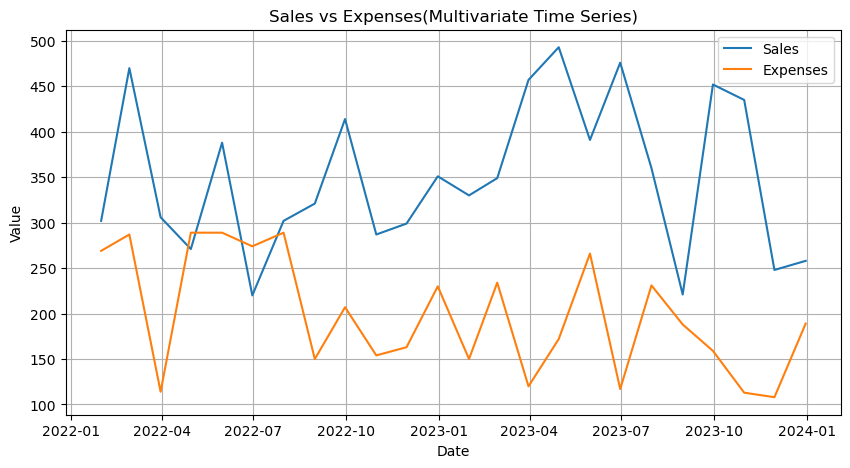

In [16]:
plt.figure(figsize =(10,5))
plt.plot(df.index, df["Sales"] ,label = "Sales")
plt.plot(df.index, df["Expenses"] ,label = "Expenses")
plt.title("Sales vs Expenses(Multivariate Time Series)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


 Forecasted sales for Next 6 months :
 2024-01-31    372.163752
2024-02-29    333.577859
2024-03-31    300.811208
2024-04-30    334.681092
2024-05-31    332.742211
2024-06-30    318.289319
Freq: ME, Name: predicted_mean, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


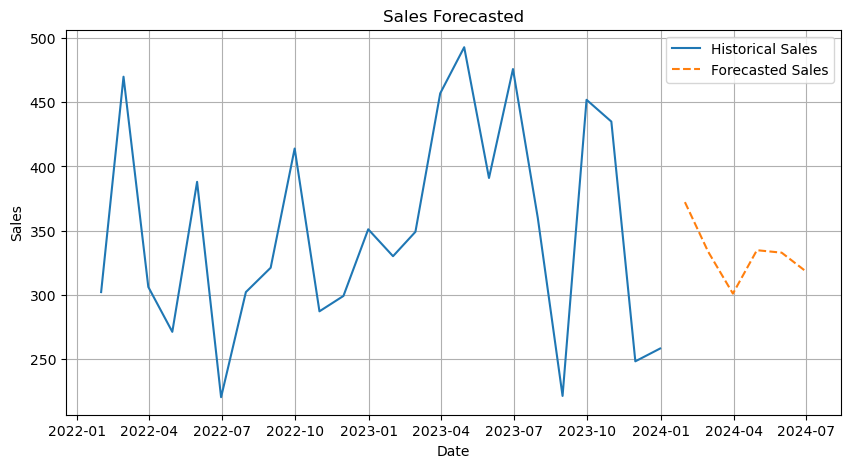

In [24]:
model = ARIMA(df["Sales"],order= (2,1,2))
model_fit= model.fit()
forecast = model_fit.forecast(steps= 6)
print("\n Forecasted sales for Next 6 months :\n",forecast)
plt.figure(figsize = (10,5))
plt.plot(df.index, df["Sales"], label = "Historical Sales")
plt.plot(pd.date_range(df.index[-1]+pd.offsets.MonthBegin(), periods = 6, freq ="ME"),forecast, label = "Forecasted Sales" , linestyle="--")
plt.title("Sales Forecasted")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()